<a href="https://colab.research.google.com/github/zbuitrago/Trabajo-3/blob/main/PAD3_UNION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **Fundamentos de programación para analítica de datos.**
---
>>**Maestría en Analítica de Datos**

>>**Universidad Central  2020 - II**

> >*Profesor: Jorge Enrique Victorino Guzman*

> >Presentado por: Buitrago Catillo, Zuly - Ochoa Bueno, Oscar Javier - Prada Urbina, Jennifer Vivian.
---
**Tema:** Calidad de los datos

---

**Descripción:**

A través del ambiente de trabajo de: “Google Colaboratory”, desarrollar y aplicar, los pasos y procesos enfocados a la calidad de datos vistos en clase, usando el archivo llamado: “examen3.xlsx”. Cumpliendo los requerimientos que se describen a continuación:



---

### __Requerimientos__
---

1. Hacer una función que crea un dataframe a partir de los atributos de los datos de entrada examen3.xlsx , los cuales son:
a. Nombre de la columna del dataframe de entrada
b. Tipo de dato (incluido: int, float, string, datetime, boolean)
c. Tipo de variable (Continua, numérica discreta, categórica)
d. Cantidad de valores únicos
e. Cantidad de valores nulos
f. Valor que más se repite
g. Frecuencia del valor que más se repite
h. Valor máximo
i. Valor mínimo
2. Analice el tipo de dato de cada columna para saber si es el correcto. Si no lo es, determine los valores que generan problemas y clasifique los tipos de problemas que aparecen. Luego cree una función que corrija los valores erróneos, y finalmente, verifique que queda el tipo correcto en cada columna. Reporte los datos que cambió.
3. Haga una gráfica de distribución univariada por cada columna. En caso de tener una variable categórica y si la cantidad de valores únicos es menor a la raíz cuadrada de la cantidad de registros, haga una gráfica de barras de mayor a menor de la frecuencia de cada categoría. La gráfica con un máximo de hasta 20 barras y el resto se agrupan en una sola barra llamada “ otras ”. Analice cada una de las gráficas.
4. Para las variables numéricas, haga un mapa de correlación y analice qué variables tienen una fuerte relación. Luego, haga un gráfico de distribución bivariada con las columnas que tienen una fuerte relación y use esto para deducir reglas entre las variables.
5. Para las variables categóricas y ordinales busque relaciones de jerarquía entre las clases. Si hay relación entre las categorías pinte un árbol mostrando esta. Finalmente, deduzca las reglas de relación entre las variables.
6. Haga un análisis de los valores faltantes, determine si se presenta algún problema de integridad con la ausencia de los datos. Si es así, use las reglas definidas entre las variables para rellenar con el dato apropiado. Reporte los cambios.
7. Analice la ocurrencia de datos duplicados con todos los atributos y con las
columnas: {IDE, curso, créditos}. Evalúe si es necesario eliminar registros duplicados para mejorar la calidad de los datos, en tal caso proceda a eliminarlos y reporte las acciones realizadas.
8. Identifique, analice y si es posible corrija valores atípicos encontrados en las columnas. Reporte los cambios realizados.
9. Teniendo en cuenta el siguiente problema: " Analizar el desempeño de los
estudiantes en el examen y el resto del semestre, relacionado con el profesor, el grupo, el programa académico, y la jornada " determine e indique qué filas y
columnas no son relevantes para este análisis y se pueden filtrar. Finalmente,
genere el dataframe depurado con la mejor calidad que se pudo obtener para la
tarea que se plantea en este punto.
10. Genere conclusiones acerca de todo el proceso de calidad de datos aplicado a la base entregada. Haga una evaluación de la calidad del resultado final y haga recomendaciones para hacer este proceso en el futuro.
---

In [1]:
# Librerias a usar:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pylab import *
from scipy import stats
import statistics
from scipy.stats import mode
from numpy import nan
from datetime import datetime
from plotly.subplots import make_subplots

# importar archivo Excel:
df = pd.read_excel('examen3.xlsx')

#1.__Inspección__


---


En esta fase se inicia la revisión a los datos que contiene el archivo "*examen.xlsx*", creándose una función **create_attribute_df**, que identifica los tipos de datos para las 33 columnas con información que este archivo contiene, entregando un dataframe llamado "**attribute_df**", con la informacion que se describe en el requerimiento número 1.


In [2]:
def create_attribute_df(df):
  '''create_attribute_df: función que crea dataframe con atributos de dataframe entrante 
                  Argumentos:
                        df:(Requerido) recibe dataframe  
                         
                  Retorno: 
                        attribute_df: dataframe resultante por cada fila tiene la evaluación de cada atributo especificado a continuación:
                            column_names: nombre de la columna
                            data_type: tipo de dato expresado ( int, float, string, datetime, boolean)
                            variable_type : clasificación de variable en:Continua, numérica discreta, categórica
                            quantity_unique_values:Cantidad de valores únicos
                            quantity_null_values: Cantidad de valores nulos
                            most_repeated_value:Valor que más se repite 
                            frec_most_repeated_value: Frecuencia del valor que más se repite
                            max_value:Valor máximo
                            min_value:Valor mínimo
                         ''' 

  # Crear dataframe con los atributos solicitados 
  attribute_df = pd.DataFrame(columns=['column_names','data_type','variable_type','quantity_unique_values','quantity_null_values','most_repeated_value','frec_most_repeated_value','max_value','min_value'])
  # Recorrer el dataframe por columnas y obtener la data de cada una
  for (columnname,columndata) in df.iteritems():
    # Capturar los valores calculados
    data=get_column_data(columnname,columndata)
    # identificar el siguiente index 
    attribute_df_length=len(attribute_df)
    # asignar datos al ultimo index 
    attribute_df.loc[attribute_df_length]=data
  #display(attribute_df)
  return attribute_df
 
  
  
def get_column_data(columnname,columndata): 
  '''get_column_data: función que crea un arreglo resultado 
                  Argumentos:
                        columnname:(Requerido) recibe el nombre de la columna
                        columndata:(Requerido) recibe los datos de la columna
                         
                  Retorno: 
                        attributes: es un arreglo donde cada posición es el resultado de la evaluación de un atributo, descripción por posición
                            [0]=column_names : nombre de la columna
                            [1]=data_type: tipo de dato expresado ( int, float, string, datetime, boolean)
                            [2]=variable_type : clasificación de variable en:Continua, numérica discreta, categórica
                            [3]=quantity_unique_values:Cantidad de valores únicos
                            [4]=quantity_null_values: Cantidad de valores nulos
                            [5]=most_repeated_value:Valor que más se repite 
                            [6]=frec_most_repeated_value: Frecuencia del valor que más se repite
                            [7]=max_value:Valor máximo
                            [8]=min_value:Valor mínimo
                         ''' 

  # Definir arreglo 
  attributes=[]
  # Capturar nombre de la columna
  attributes.append(columnname)
  # tipo de dato
  attributes.append(get_column_type(columndata))
  # tipo de variable
  attributes.append(get_varible_type(get_column_type(columndata)))
  # Valores unicos
  attributes.append(len(columndata.unique()))
  # Valores nulos
  attributes.append(len(columndata[columndata.isnull()]))
  # Valor que mas se repite
  attributes.append(columndata.value_counts().idxmax())
  # Frecuencia del valor que mas se repite
  attributes.append(columndata.value_counts().max())
  # Valor máximo 
  if get_column_type(columndata)!='string':
    
    attributes.append(max(columndata))
  # Valor mínimo
    attributes.append(min(columndata))
  elif get_column_type(columndata)=='string':
    attributes.append('NA')
    attributes.append('NA')

  return attributes

def get_column_type(columndata): 
  '''get_column_type: función evalua el tipo de dato y lo normaliza 
                  Argumentos:
                        columndata:(Requerido) recibe los datos de la columna                       
                  Retorno: 
                        columntypef: string que especifica el tipo de dato normalizado
                         ''' 
  # Determinar el tipo de dato por columna
  columntype=columndata.dtypes
  columntypef=''
  # Renombrar el tipo de dato 
  if columntype=='int64':
    columntypef='int'
  if columntype =='float64':
    columntypef='float'
  if columntype=='bool':
    columntypef='boolean'
  if columntype =='datetime64[ns]':
    columntypef='datetime'
  if columntype =='object':
    columntypef='string'
  
      
  return columntypef

def get_varible_type (datatype):
  '''get_varible_type: función que retorna el tipo de variable según el tipo de dato de la columna 
                  Argumentos:
                        datatype:(Requerido) recibe el tipo de dato de la columna                       
                  Retorno: 
                        datatype: string que especifica el tipo de variable 
                         ''' 
  # clasificación de tipo de variable 
  if datatype=='int': return 'Discreta'
  if datatype=='float' or datatype=='datetime': return 'Continua'
  if datatype=='boolean': return 'Cualitativa Dicotomica'
  if datatype=='string': return 'Categorica'


Continuando con la inspección de los datos, se ha detectado que algunas columnas no están con el tipo de dato correcto, se ha creado una función llamada: "**fix_column_data**", que reconoce y genera el ajuste en los tipos de datos. Como lo solicita el requerimiento número 2.

El Dataframe con estos ajustes realizados se llama: "**fixed_df**"

In [3]:
def fix_column_data(df): 
  '''fix_column_data: función que modifica el tipo de  dato de las columnas que tienen algún o algunos registros errados;
                        remplazando datos string por 0 en columnas que deben ser int o float y en las columnas string reemplaza
                        los valores númericos por un valor vacio

                  Argumentos:
                        df:(Requerido) dataframe de entrada
                                                
                  Retorno: 
                        fixed_df: copia del dataframe de entrada con algunas columnas modificadas en el tipo de dato de la columna
                        ''' 


  # Copiar el dataframe de entrada
  fixed_df=df.copy()  
  # Iterar dataframe y obtener el nombre de la columna y los datos de cada una
  for (columnname,columndata) in fixed_df.iteritems():
  # Evaluar las todas las columnas que son tipo object
    if columndata.dtypes =='object':
      # Intentar convertir la columna en datetime
      try:
        fixed_df[columnname]=pd.to_datetime(columndata)
        #fixed_df[columnname]=pd.to_timedelta(columndata)
      
      except:
      # Evaluar por cada fila el tipo de dato que se tiene
        intsum=0
        stringsum=0
        floatsum=0
        issuestring,issueint=[],[]
        for row in columndata:
        # Contar la cantidad de datos por cada tipo de dato y crear un arreglo de los datos evaluados 
          if isinstance(row,int):
            intsum=intsum + 1
            issueint.append(row)
          elif isinstance(row,float):
            floatsum=floatsum + 1
            issueint.append(row)
          elif isinstance(row,str):
            stringsum= stringsum+1
            issuestring.append(row)
        # crear un diccionario con el resultado del conteo 
        typesdict={'int':intsum,'float':floatsum,'str':stringsum}
        # Ordenar el diccionario
        sort_type=sorted(typesdict.items(),key=lambda x:x[1],reverse=True)
        # Tomar la primera ubicación del diccionario 
        columntypef=sort_type[0][0]
        # Evaluar por el resultado de la variable anterior por que se reemplaza el valor errado
        if columntypef== 'int' or columntypef== 'float':
          fixed_df.loc[fixed_df[columnname].isin(issuestring), columnname] = 0.0
          fixed_df[columnname] = pd.to_numeric(fixed_df[columnname])

        elif columntypef== 'str':
          fixed_df.loc[fixed_df[columnname].isin(issueint), columnname] = None
          fixed_df[columnname] = fixed_df[columnname]

  return fixed_df

In [4]:
# Asignar función de cambios de tipo de datos a nuevo dataframe 
fixed_df=fix_column_data(df)
# Evaluar de nuevo la función del punto 2.1
attribute_df=create_attribute_df(fixed_df)

In [5]:
# Asignar función de cambios de tipo de datos a nuevo dataframe 
fixed_df=fix_column_data(df)
# Evaluar de nuevo la función del punto 2.1
attribute_df=create_attribute_df(fixed_df)
# Evaluar si el tipo de datos se modificaron el daframe de atributos
#display(attribute_df[attribute_df.column_names.isin(['fallas','horaExamen','inicio','final'])])
#print("En la siguiente tabala se muestra las columnas fallas,horaExamen,inicio,final ya cuentan con el tipo de dato correcto")

## Punto 3 parte Zuly codigo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



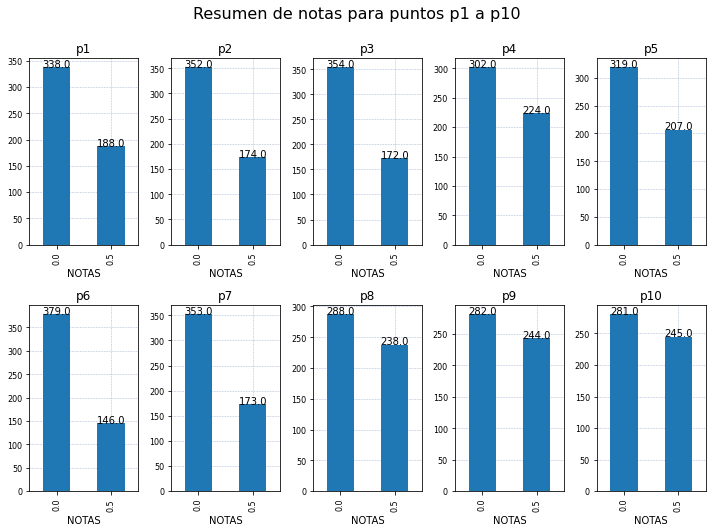

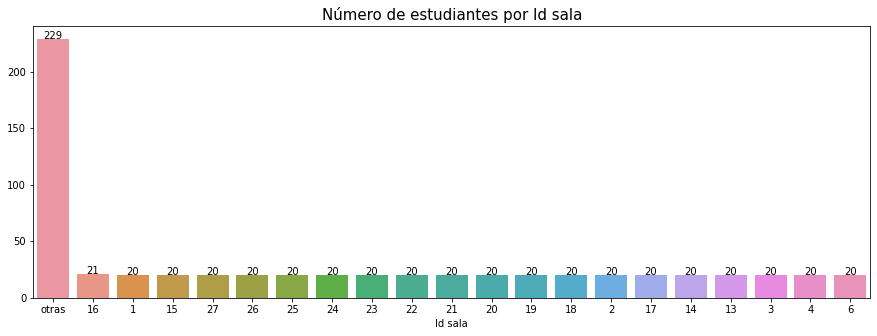

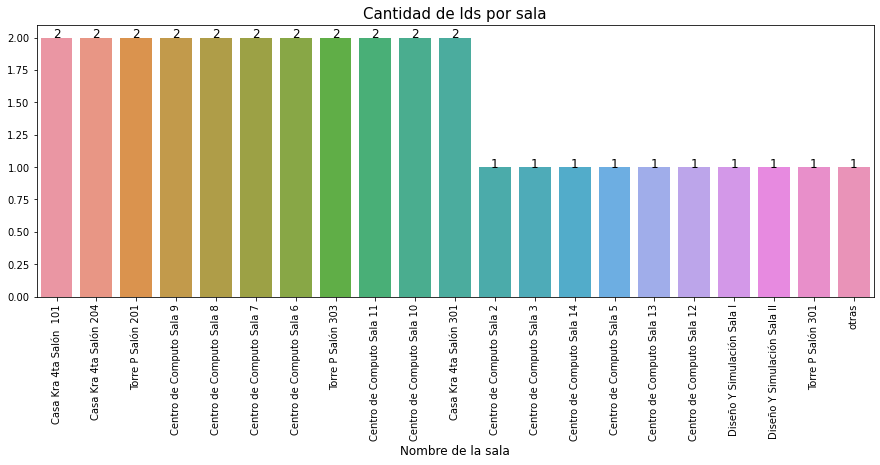

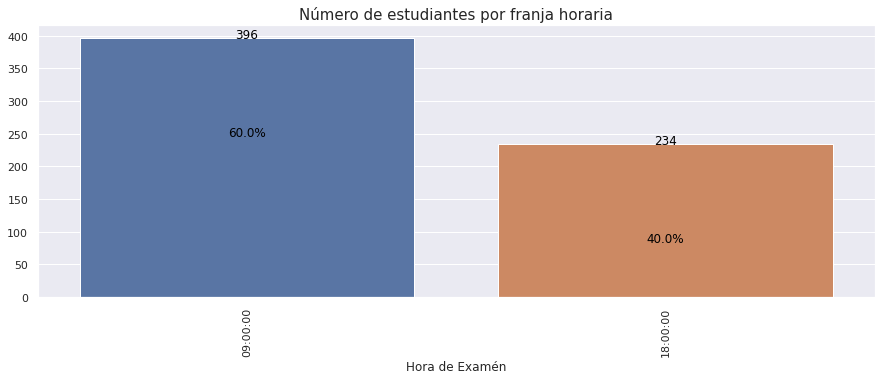

In [6]:
from pylab import *
# gráfico de columnas de p1 a p10
# Definir espacio 
fig3_17, axs = plt.subplots(1,1,figsize=(10,7),constrained_layout=True)
# Título
fig3_17.suptitle('Resumen de notas para puntos p1 a p10', fontsize=16,y=1.05)
# lista de columnas a emplear
notas=["p1", "p2", "p3", "p4","p5","p6","p7","p8","p9","p10"]
i=1
# recorrido de columnas 
for p in notas:
  # definición de subplot
  subplot(2,5,i)
  # datos 
  dfp = fixed_df[p].value_counts().rename_axis('unique_values').reset_index(name='counts')
  # gráfico
  fig_318 = fixed_df[p].value_counts().plot(kind='bar',fontsize=8,align='center',zorder=3)
  # etiquetas
  fig_318.axes.set_title(p,fontsize=12)
  fig_318.set_xlabel("NOTAS",fontsize=10)
  for index, col in dfp.iterrows():
    fig_318.text(col.name, col.counts, round(col.counts,0), color = 'black', ha = "center")
  fig_318.grid(color='b',alpha=0.5,linestyle='dashed',linewidth=0.5,zorder=0)
  i=i+1
fig3_17.tight_layout()
# gráfico de nsala 
# Crear primera agrupación por nsala 
merge=fixed_df.groupby(by=["nsala"], dropna=False).agg({'IDE':'count'}).sort_values(['IDE'], ascending=[False])
# Reiniciar index
merge.reset_index(inplace = True) 
# seleccionar los 20 top del groupby
merge['nsala']=where(merge.index<=19,merge['nsala'],"otras")
# Crear categoria de "otras" con los resultados no top
merge2=merge[merge.index>=20]
merge2=merge2.groupby(by=["nsala"], dropna=False).agg({'IDE':'sum'}).sort_values(['IDE'], ascending=[False])
merge=merge[merge.index<=19]
merge2.reset_index(inplace = True) 
merge = pd.concat([merge2, merge])
merge.reset_index(inplace = True) 
# gráficar
fig3_15, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x='nsala', y='IDE', data=merge, ax = ax)
plt.title("Número de estudiantes por Id sala",fontsize=15)
plt.xlabel("Id sala")
plt.ylabel("")
for index, col in merge.iterrows():
  plt.text(col.name, col.IDE, round(col.IDE,0), color = 'black', ha = "center")

# Números de id por nombre de sala
merge=fixed_df.groupby(by=["sala"], dropna=False).agg({'nsala':'nunique'}).sort_values(['nsala'], ascending=[False])
# Reiniciar index
merge.reset_index(inplace = True) 
merge['sala']=where(merge.index<=19,merge['sala'],"otras")
# gráficar
fig3_16, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x='sala', y='nsala', data=merge, ax = ax)
plt.title("Cantidad de Ids por sala",fontsize=15)
plt.xlabel("Nombre de la sala",fontsize=12)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(10,6.)})
plt.ylabel("")

for index, col in merge.iterrows():
  plt.text(col.name, col.nsala, round(col.nsala,0), color = 'black', ha = "center")
# Hora de examén
fixed_dfm=fixed_df.copy()
fixed_dfm["horaExamen"]=[d.time()  for d in fixed_df["horaExamen"]]
merge=fixed_dfm.groupby(by=["horaExamen"], dropna=False).agg({'IDE':'count'}).sort_values(['IDE'], ascending=[False])
# Reiniciar index
merge.reset_index(inplace = True) 
fig3_18, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x='horaExamen', y='IDE', data=merge, ax = ax)
plt.title("Número de estudiantes por franja horaria",fontsize=15)
plt.xlabel("Hora de Examén",fontsize=12)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(10,6.)})
plt.ylabel("")
meanhe = fixed_df['IDE'].count()

for index, col in merge.iterrows():
  plt.text(col.name, col.IDE, round(col.IDE,0), color = 'black', ha = "center")
  plt.text(col.name, col.IDE-150, "{}%".format(round(col.IDE/meanhe,1)*100), color = 'black', ha = "center")
# Hora de inicio de examén
fixed_dfmh=fixed_df.copy()

fixed_dfmh["final"]=fixed_df["final"].dt.strftime('%H:%M')
fixed_dfmh["inicio"]=fixed_df["inicio"].dt.strftime('%H:%M')
fixed_dfmh["final"].fillna("No presento",inplace=True)
fixed_dfmh["inicio"].fillna("No presento",inplace=True)
inicio18=fixed_dfmh[fixed_dfmh["horaExamen"]=='6:00 p.m']
inicio9=fixed_dfmh[fixed_dfmh["horaExamen"]=='9:00 a.m']

inicio18=inicio18.groupby(by=["inicio","horaExamen"], dropna=False).agg({'IDE':'count'}).sort_values(['IDE'], ascending=[False])
inicio9=inicio9.groupby(by=["inicio","horaExamen"], dropna=False).agg({'IDE':'count'}).sort_values(['IDE'], ascending=[False])

# Reiniciar index
inicio9.reset_index(inplace = True) 
inicio18.reset_index(inplace = True) 
# seleccionar los 20 top del groupby
inicio9['inicio']=where(inicio9.index<=19,inicio9['inicio'],"otras")
inicio18['inicio']=where(inicio18.index<=19,inicio18['inicio'],"otras")
# Crear categoria de "otras" con los resultados no top
merge29=inicio9[inicio9.index>=20]
merge218=inicio18[inicio18.index>=20]
merge29=merge29.groupby(by=["inicio","horaExamen"], dropna=False).agg({'IDE':'sum'}).sort_values(['IDE'], ascending=[False])
merge218=merge218.groupby(by=["inicio","horaExamen"], dropna=False).agg({'IDE':'sum'}).sort_values(['IDE'], ascending=[False])
inicio18=inicio18[inicio18.index<=19]
inicio9=inicio9[inicio9.index<=19]
merge29.reset_index(inplace = True) 
merge218.reset_index(inplace = True) 
inicio18 = pd.concat([merge218, inicio18])
inicio9 = pd.concat([merge29, inicio9])
inicio9.reset_index(inplace = True)
inicio18.reset_index(inplace = True)
inicio9=inicio9.sort_values('IDE', ascending=False)
inicio18=inicio18.sort_values('IDE', ascending=False)
# Hora de finalización de examén
finicio18=fixed_dfmh[fixed_dfmh["horaExamen"]=='6:00 p.m']
finicio9=fixed_dfmh[fixed_dfmh["horaExamen"]=='9:00 a.m']

finicio18=finicio18.groupby(by=["final","horaExamen"], dropna=False).agg({'IDE':'count'}).sort_values(['IDE'], ascending=[False])
finicio9=finicio9.groupby(by=["final","horaExamen"], dropna=False).agg({'IDE':'count'}).sort_values(['IDE'], ascending=[False])

# Reiniciar index
finicio9.reset_index(inplace = True) 
finicio18.reset_index(inplace = True) 
# seleccionar los 20 top del groupby
finicio9['final']=where(finicio9.index<=19,finicio9['final'],"otras")
finicio18['final']=where(finicio18.index<=19,finicio18['final'],"otras")
# Crear categoria de "otras" con los resultados no top
merge29=finicio9[finicio9.index>=20]
merge218=finicio18[finicio18.index>=20]
merge29=merge29.groupby(by=["final","horaExamen"], dropna=False).agg({'IDE':'sum'}).sort_values(['IDE'], ascending=[False])
merge218=merge218.groupby(by=["final","horaExamen"], dropna=False).agg({'IDE':'sum'}).sort_values(['IDE'], ascending=[False])
finicio18=finicio18[finicio18.index<=19]
finicio9=finicio9[finicio9.index<=19]
merge29.reset_index(inplace = True) 
merge218.reset_index(inplace = True) 
finicio18 = pd.concat([merge218, finicio18])
finicio9 = pd.concat([merge29, finicio9])
finicio9.reset_index(inplace = True)
finicio18.reset_index(inplace = True)
finicio9=finicio9.sort_values('IDE', ascending=False)
finicio18=finicio18.sort_values('IDE', ascending=False)


fig3_19 = make_subplots(rows=2, cols=2,y_title='Cantidad de estudiantes',
                    subplot_titles=('Hora inicio de Examén franja de 9:00 a.m',  'Hora inicio de Examén franja de 6:00 p.m', 
                                    'Hora final de Examén franja de 9:00 a.m', 'Hora final de Examén franja de 6:00 p.m'))
fig3_19.append_trace(                 
    go.Bar( x=inicio9['inicio'], y=inicio9['IDE'],marker_color='crimson'),1,1)
fig3_19.append_trace(
    go.Bar(x=inicio18['inicio'], y=inicio18['IDE'],marker_color='lightslategrey'),1,2)
fig3_19.append_trace(
    go.Bar(x=finicio9['final'], y=finicio9['IDE'],marker_color='crimson'),2,1)
fig3_19.append_trace(
    go.Bar(x=finicio18['final'], y=finicio18['IDE'],marker_color='lightslategrey'),2,2)
fig3_19['layout']['xaxis3']['title']='hora'
fig3_19['layout']['xaxis4']['title']='hora'
fig3_19.update_layout(barmode='stack',showlegend=False,
   title_text='Número de Estudiante por hora de inicio de examén', # title of plot
 
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)


#2._Limpieza_

Se corrige las anomalias encontradas en las columnas "programa", "fallas", "IDP" y "profesor"

####Ocurrencia de datos duplicados

In [7]:
# Determinar las si existe columnas duplicadas en el dataframe de atributos
mask1 = attribute_df.duplicated(keep=False)
t = 0
f = 0
for i in mask1:
  if i == True:
    t += 1
  else:
    f += 1
# Asignar función de cambios de tipo de datos a nuevo dataframe 
fixed_df=fix_column_data(df)
# Evaluar de nuevo la función del punto 2.1
attribute_df=create_attribute_df(fixed_df)
# Determinar filas duplicadas con las columnas IDE, curso y creditos
mask = fixed_df[['IDE','curso','creditos']].duplicated(keep=False)
lista = []
for x in range(len(mask)):
  if mask[x] == True:
    lista.append(x)
data = fixed_df.loc[lista]
data.sort_values(['IDE'], ascending=[True], inplace=True)

# Eliminar los registros duplicados
fixed_df=fixed_df.drop(fixed_df[(fixed_df.corte1 == 0) & (fixed_df.corte2 == 0) & (fixed_df.nota.isnull())].index)
fixed_df = fixed_df.drop_duplicates(subset=['IDE', 'curso', 'creditos'], keep='first')


#### Correción de datos atípicos


In [11]:
# Dataframe a emplear es fixed_df
# 1. Columna de programa presenta variación en la forma de escritura
fixed_df.programa = fixed_df.programa.replace({'Ingeniería Electórnica': 'Ingeniería Electrónica'})
fixed_df.programa = fixed_df.programa.replace({'Ingeniería Industial': 'Ingeniería Industrial'})
# 2. Corregir IDP 
fixed_df.loc[fixed_df.IDP==208,'profesor']='Menelao'
#3. Corregir jornada
programas=['G1','G3','G4','G6','G8','G9','G11','G14','G15','G32','G33']
for p in programas:
  fixed_df.loc[fixed_df['IDG']==(p),'jornada']="día"
#4. Corregir dedicacion
fixed_df.dedicacion = fixed_df.dedicacion.replace({'tc': 'TC'})
#5. Calcular la sumatoria de las notas
fixed_df['nota'] = fixed_df[['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10']].sum(axis=1)
# 6. Franja horaria 
dfh=df[(df['horaExamen'].isin(['9:00 a.m.']))&(df['inicio'].notnull()) & (df['inicio'].astype(str).str[0:2].str.contains('9')== False)]
dfh1=df[(df['horaExamen'].isin(['6:00 p.m.']))&(df['inicio'].notnull()) & (df['inicio'].astype(str).str[0:2].str.contains('18')== False)]
dfh = pd.concat([dfh,dfh1])
dfh=pd.DataFrame(dfh,columns=['IDE','horaExamen','inicio','final'])
# Cambio en registros de las columnas inicio y final
fixed_df.loc[fixed_df.IDE == 1579, 'inicio'] = fixed_df['horaExamen']
fixed_df.loc[fixed_df.IDE == 1702, 'inicio'] = fixed_df['horaExamen']
fixed_df.loc[fixed_df.IDE == 1831, 'inicio'] = fixed_df['horaExamen']
fixed_df.loc[fixed_df.IDE == 1900, 'inicio'] = fixed_df['horaExamen'][146]
fixed_df.loc[fixed_df.IDE == 1681, 'inicio'] = fixed_df['horaExamen'][146]

dfhf=fixed_df[fixed_df['IDE'].isin([1579,1702,1831,1900,1681])]
dfhf=pd.DataFrame(dfhf,columns=['IDE','horaExamen','inicio','final'])


#3._Tratamiento de Datos Faltantes_

In [ ]:
# Reemplazar datos faltantes en columna de final e inicio con "No presento"
fixed_df["final"].fillna("No presento",inplace=True)
fixed_df["inicio"].fillna("No presento",inplace=True)
#Reemplazar datos faltantes en las demas columnas
notas=["p1", "p2", "p3", "p4","p5","p6","p7","p8","p9","p10"]
for n in notas:
  fixed_df[n] = fixed_df[n].replace(np.nan,0)


#4._Verificación_

In [13]:
final_df=fixed_df.loc[:, ['IDE','programa','IDG','corte1','corte2','prom','IDP','nestud','jornada','profesor','dedicacion','horaExamen','inicio','final','nota']].copy()


#5._Informe_

###Resultados de inspección

####Análisis de tipo de dato errado


In [ ]:
# Cargue de dataframe del punto 2.1
attribute_df=create_attribute_df(df)
print("Resultado de los atributos de la columna fallas")
display(attribute_df[attribute_df.column_names=='fallas'])
# Visualidar valores unicos de la columna fallas 
print('Valores unicos de la columna fallas',df.fallas.unique())
print("")
print('\033[1m'+"Se evidencia que la columna fallas tiene datos errados para el tipo de columna como lo son: nada,ninguna y no.")
print("Esto nos genera un error al momento de evaluar le tipo de dato de la columna. Además de no evaluar correctamente\n"
      "los atributos de máximo, mínimo,valor que más se repite y su frecuencia."+"\033[0;0m")

print("\nResultado de los atributos de la columnas horaExamen,inicio,final")
display(attribute_df[attribute_df.column_names.isin(['horaExamen','inicio','final'])])
#Mirar que datos tienen las columnas horaExamen,inicio,final
print('Valores unicos de la columna horaExamen:\n',df.horaExamen.unique(),'\n')
print('Valores unicos de la columna inicio:\n',df.inicio.unique()[:10],'\n')
print('Valores unicos de la columna final:\n',df.final.unique()[:10],'\n')

print('\033[1m'+"\nSe evidencia que las columnas horaExamen,inicio,final son de tipo datetime.")
print("Esto nos genera un error al momento de clasificar la variable . Además de no evaluar correctamente\n"
      "los atributos de máximo, mínimo.""\033[0;0m")
print('\033[1m'+'--'*50+"\033[0;0m")
# Asignar función de cambios de tipo de datos a nuevo dataframe 
fixed_df=fix_column_data(df)
# Evaluar de nuevo la función del punto 2.1
attribute_df=create_attribute_df(fixed_df)
print('\033[1m'+"\nCorrección de datos"+"\033[0;0m")
# Evaluar si el tipo de datos se modificaron el daframe de atributos
display(attribute_df[attribute_df.column_names.isin(['fallas','horaExamen','inicio','final'])])
print('\033[1m'+"En tabla se muestra las columnas fallas,horaExamen,inicio,final ya cuentan con el tipo de dato correcto"+"\033[0;0m")

#### Análisis de columnas Dataframe

In [ ]:
fig3_15

fig3_15 Gráfico del número de estudiantes por el id de cada sala

Análisis del Gráfico 3.15
* La cantidad promedio de estudiantes por Id de sala es de  19.69
* De los 32 Id de sala se crea una subcategoria de otras de los id (1,17,30,28,8,9,29,10,32,5,7,31). que no se encuentran entre el top 20 

In [ ]:
fig3_16

fig3_16 Gráfico del número de id de sala por nombre de sala

Análisis del Gráfico 3.16
* Se cuenta con 21 salas y 11 de estas tienen dos Id diferentes por el mismo nombre. esto tiene como consecuencia que al evaluar la cantidad de estudiantes por nombre de sala se duplicara
* Solo 10 de las salas cuentan con Id unico


In [ ]:
fig3_17

Gráfico 3.17 Resumen gráfico de las calificaciones por cada punto del exámen

Análisis del Gráfico 3.17

* Las variables ["p1", "p2", "p3", "p4","p5","p6","p7","p8","p9","p10"]. se tiene el mismo rango de resultado 0.0 o 0.5, por esto se decide realizar un gráfico conjunto
* La cantidad total de registros con notas de 0.5 o 0.0 es de 526, 104 datos se encuentran vacios  
* La nota con mayor concurrencia fue 0.0 en los 10 puntos. Esta nota tiene más del 53% de registros por punto
* Los puntos (p4,p8,p9,p10) son los que tienen más del 40% de respuestas correctas


In [ ]:
fig3_18

Gráfico 3.18 Número de estudiantes por horario de examén

Análisis del Gráfico 3.18

* El 60% de estudiantes presentó el examén en la franja de las  9:00  y el 40% lo presento  18:00

In [ ]:
fig3_19

Gráfico 3_19 Segmentación de Cantidad de estudiantes por hora de inicio,finalización  y Franja prevista para la presentacion de examén 

 Análisis del Gráfico 3.19

* 104 Estudiantes no presentaron el examén
* 293 Estudiantes iniciaron el examén antes de 9:30 a.m 
* 166 Estudiantes iniciaron el examén antes de 6:30 p.m 
* Del top 20 la mayoria de estudiantes finalizaron el examén en 1 hora


####Análisis de datos duplicados

In [ ]:
print('\033[1m'+'El dataframe de examen3.xlsx presenta ', t, 'columnas duplicadas\n'+"\033[0;0m")
print('\033[1m'+'--'*50+"\033[0;0m")
print('\033[1m'+'\nResumen de columnas con valores nulos y atributos de estas columnas'+"\033[0;0m")
display(attribute_df[attribute_df['quantity_null_values']!=0])

### Tratamiento de datos faltantes y duplicados

**Datos faltantes**

El dataframe tiene 630 registros y 33 columnas, los valores faltantes se encuentran en las siguientes columnas: inicio, final,nota,p1,p2,p3,p4,p5,p6,p7,p8,p9 y p10 con un total de 104 registros faltantes.

Se procede a completar los datos faltantes las columnas de inicio y final con 'no presento', para evitar confusión al momento de completar las columnas p1 a p10 con ceros de los datos faltantes. Esto con la finalidad de evitar llegar a concluir que las personas que tienen cero en la nota del examén es porque no lo presentaron. Debido que hay estudiantes que si presentaron el examén e igual tienen 0.0



**Datos duplicados**

No se toma como único criterio que los datos se encuentres duplicados de las columnas: {IDE, curso, créditos}. debido que se debe tener presente que algunos de estos tiene alguna calificación en corte1,corte2 o nota. Para eliminar algún registro la nota debe ser nula y el registro en corte1 y corte2 debe ser 0


In [ ]:
print('Dentro del dataframe existen', len(data), 'filas duplicadas:')
print('Se eliminan los datos duplicados dejando el registro inicial' , len(fixed_df), 'de' , len(df), 'iniciales')
print('La dimensión final del DataFrame sin duplicados es:' , fixed_df.shape)


### Reporte de datos atípicos

In [12]:
print('\033[1m'+"Columnas con datos atípicos\n")
print("Columna programa"+"\033[0;0m")
print(df.programa.value_counts())
print("Los programas de ingeniería industrial y ingeniería Electrónica,presentan variaciónes en cuanto su escritura")
print('\033[1m'+"\nCorrección de datos")
print("La columna programa fue modificada en los registros de: Ingeniería Electórnica y Ingeniería Industial"+"\033[0;0m")
print(fixed_df.programa.value_counts())
print('\033[1m'+'--'*50+"\033[0;0m")

print('\033[1m'+"\n Columna IDP"+"\033[0;0m")
print("EL profesor Eneas tiene dos IDP registrados. El IDP= 208 corresponde al profesor Menelao")
print('IDP de profesor Eneas ->',pd.unique(df[df['profesor'] == 'Eneas' ]['IDP']))
print('IDP de profesor Menelao->',pd.unique(df[df['profesor'] == 'Menelao' ]['IDP']))
print('\033[1m'+"\nCorrección de datos"+"\033[0;0m")
print('\033[1m'+"La columna IDP fue modificada en los registros del profesor Eneas con IDP=208 se asignó al profesor Menelao,\nquién tiene el mayor número de registros con este IDP\n"+"\033[0;0m")
print('IDP de profesor Eneas ->',pd.unique(fixed_df[fixed_df['profesor'] == 'Eneas' ]['IDP']))
print('IDP de profesor Menelao->',pd.unique(fixed_df[fixed_df['profesor'] == 'Menelao' ]['IDP']))
print('\033[1m'+'--'*50+"\033[0;0m")

print('\033[1m'+"\n Columna jornada"+"\033[0;0m")
print("Los IDG 'G1','G3','G4','G6','G8','G9','G11','G14','G15','G32','G33'. cuentan con más de una jornada registrada")
programas=['G1','G3','G4','G6','G8','G9','G11','G14','G15','G32','G33']
for p in programas:
  print('IDG:',p,' ->',pd.unique(df[df['IDG'].isin([p]) ]['jornada']))
print('\033[1m'+"\nCorrección de datos"+"\033[0;0m")
print('\033[1m'+"La columna jornada fue modificada en los registros de IDG que aparecen a continuación\ndejando una sola jordana por IDG"+"\033[0;0m")
for p in programas:
  print('IDG:',p,' ->',pd.unique(fixed_df[fixed_df['IDG'].isin([p]) ]['jornada']))
print('\033[1m'+'--'*50+"\033[0;0m")

print('\033[1m'+"\n Columna dedicacion"+"\033[0;0m")
print("dedicacion en TC presenta variación en cuanto su escritura")
print('Valores únicos registrados en dedicacion',df.dedicacion.unique())
print('\033[1m'+"\nCorrección de datos"+"\033[0;0m")
print('\033[1m'+"La columna dedicacion fue modificada en los registros de tc por TC"+"\033[0;0m")
print('Valores únicos registrados en dedicacion',fixed_df.dedicacion.unique())
print('\033[1m'+'--'*50+"\033[0;0m")

print('\033[1m'+"\n Columna nota"+"\033[0;0m")
print("nota no debe tomar valores mayores a 5")
print('notas superiores al valor máximo',pd.unique(df[df['nota']>5]['nota']))
print('\033[1m'+"\nCorrección de datos"+"\033[0;0m")
print('\033[1m'+"se calculo de nuevo la columna nota con los puntos de p1 a p10"+"\033[0;0m")
print('Valor máximo de la columna nota:',fixed_df['nota'].max())
print('\033[1m'+'--'*50+"\033[0;0m")

print('\033[1m'+"\n Columnas inicio y final"+"\033[0;0m")
print("Registros de inicio y final que presentan alguna anomalía con respecto a la hora de examén")
display(dfh)
print('\033[1m'+"\nCorrección de datos"+"\033[0;0m")
print("Los siguientes registros fueron ajustados dependiendo la hora de inicio y final del examén")
display(dfhf)

Columnas con datos atípicos

Columna programa
Ingeniería Ambiental      236
Ingeniería De Sistemas    144
Ingeniería Electrónica     98
Ingeniería Industrial      62
Ingeniería Mecánica        59
Ingeniería Industial       19
Ingeniería Electórnica     12
Name: programa, dtype: int64
Los programas de ingeniería industrial y ingeniería Electrónica,presentan variaciónes en cuanto su escritura

Corrección de datos
La columna programa fue modificada en los registros de: Ingeniería Electórnica y Ingeniería Industial
Ingeniería Ambiental      220
Ingeniería De Sistemas    141
Ingeniería Electrónica    106
Ingeniería Industrial      77
Ingeniería Mecánica        54
Name: programa, dtype: int64
----------------------------------------------------------------------------------------------------

 Columna IDP
EL profesor Eneas tiene dos IDP registrados. El IDP= 208 corresponde al profesor Menelao
IDP de profesor Eneas -> [204 208]
IDP de profesor Menelao-> [208]

Corrección de datos
La columna I

,IDE,horaExamen,inicio,final
146,1831,9:00 a.m.,18:09:00,10:09:00
239,1702,9:00 a.m.,18:25:00,10:07:00
271,1900,9:00 a.m.,18:15:00,19:35:00
438,1681,9:00 a.m.,18:17:00,19:45:00
280,1579,6:00 p.m.,09:08:00,18:43:00



Corrección de datos
Los siguientes registros fueron ajustados dependiendo la hora de inicio y final del examén


,IDE,horaExamen,inicio,final
146,1831,2020-11-26 09:00:00,2020-11-26 09:00:00,2020-11-26 10:09:00
239,1702,2020-11-26 09:00:00,2020-11-26 09:00:00,2020-11-26 10:07:00
270,1900,2020-11-26 09:00:00,2020-11-26 09:00:00,2020-11-26 09:55:00
280,1579,2020-11-26 18:00:00,2020-11-26 18:00:00,2020-11-26 18:43:00
437,1681,2020-11-26 09:00:00,2020-11-26 09:00:00,2020-11-26 10:29:00
